# Stock Market Prediction 

## Stock Price Analysis and Prediction

First up, let's import the necessary modules, the BSESN and News-Headlines data

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from textblob import TextBlob
from datetime import datetime


import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [14]:
df=pd.read_csv('F:/letsgrow/stock.txt')
df.head(4)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.2,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.1,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.5,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.0,236.25,236.10,2349368,5503.90


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [16]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [17]:
df.isnull().sum()
df.dropna(inplace=True)

In [18]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [19]:
df['Date'] = pd.to_datetime(df['Date'])
#df.index = df['Date']
df.dropna(inplace=True)

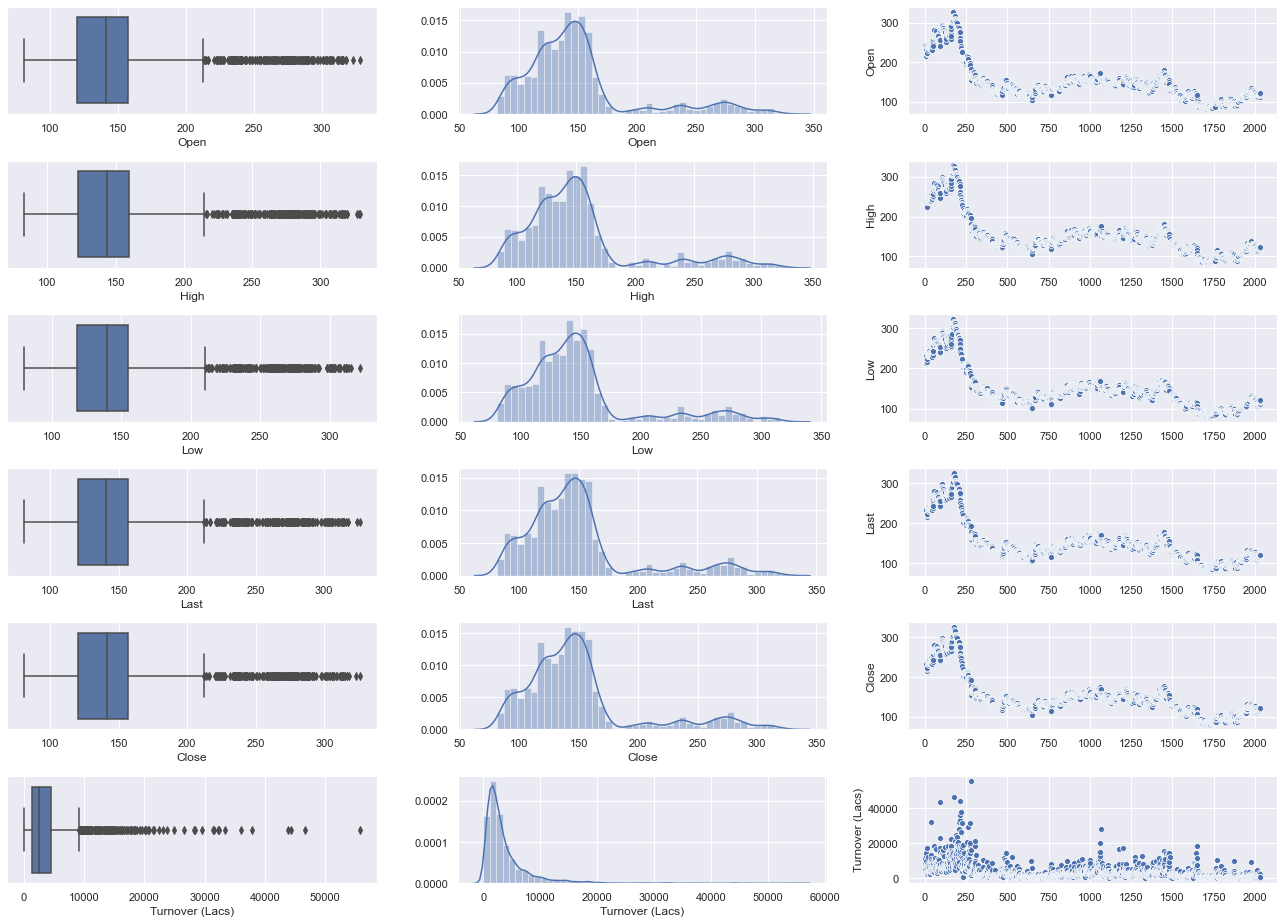

In [20]:
sns.set(style="darkgrid")
data = df
fig, ax = plt.subplots(6, 3, figsize = (18, 13))
sns.boxplot(x= data["Open"], ax = ax[0,0])
sns.distplot(data['Open'], ax = ax[0,1])
sns.scatterplot(data.index,data['Open'],ax=ax[0,2])
sns.boxplot(x= data["High"], ax = ax[1,0])
sns.distplot(data['High'], ax = ax[1,1])
sns.scatterplot(data.index,data['High'],ax=ax[1,2])
sns.boxplot(x= data["Low"], ax = ax[2,0])
sns.distplot(data['Low'], ax = ax[2,1])
sns.scatterplot(data.index,data['Low'],ax=ax[2,2])
sns.boxplot(x= data["Last"], ax = ax[3,0])
sns.distplot(data['Last'], ax = ax[3,1])
sns.scatterplot(data.index,data['Last'],ax=ax[3,2])
sns.boxplot(x= data["Close"], ax = ax[4,0])
sns.distplot(data['Close'], ax = ax[4,1])
sns.scatterplot(data.index,data['Close'],ax=ax[4,2])
sns.boxplot(x= data["Turnover (Lacs)"],ax= ax[5,0])
sns.distplot(data['Turnover (Lacs)'], ax = ax[5,1])
sns.scatterplot(data.index,data['Turnover (Lacs)'],ax=ax[5,2])

plt.tight_layout()

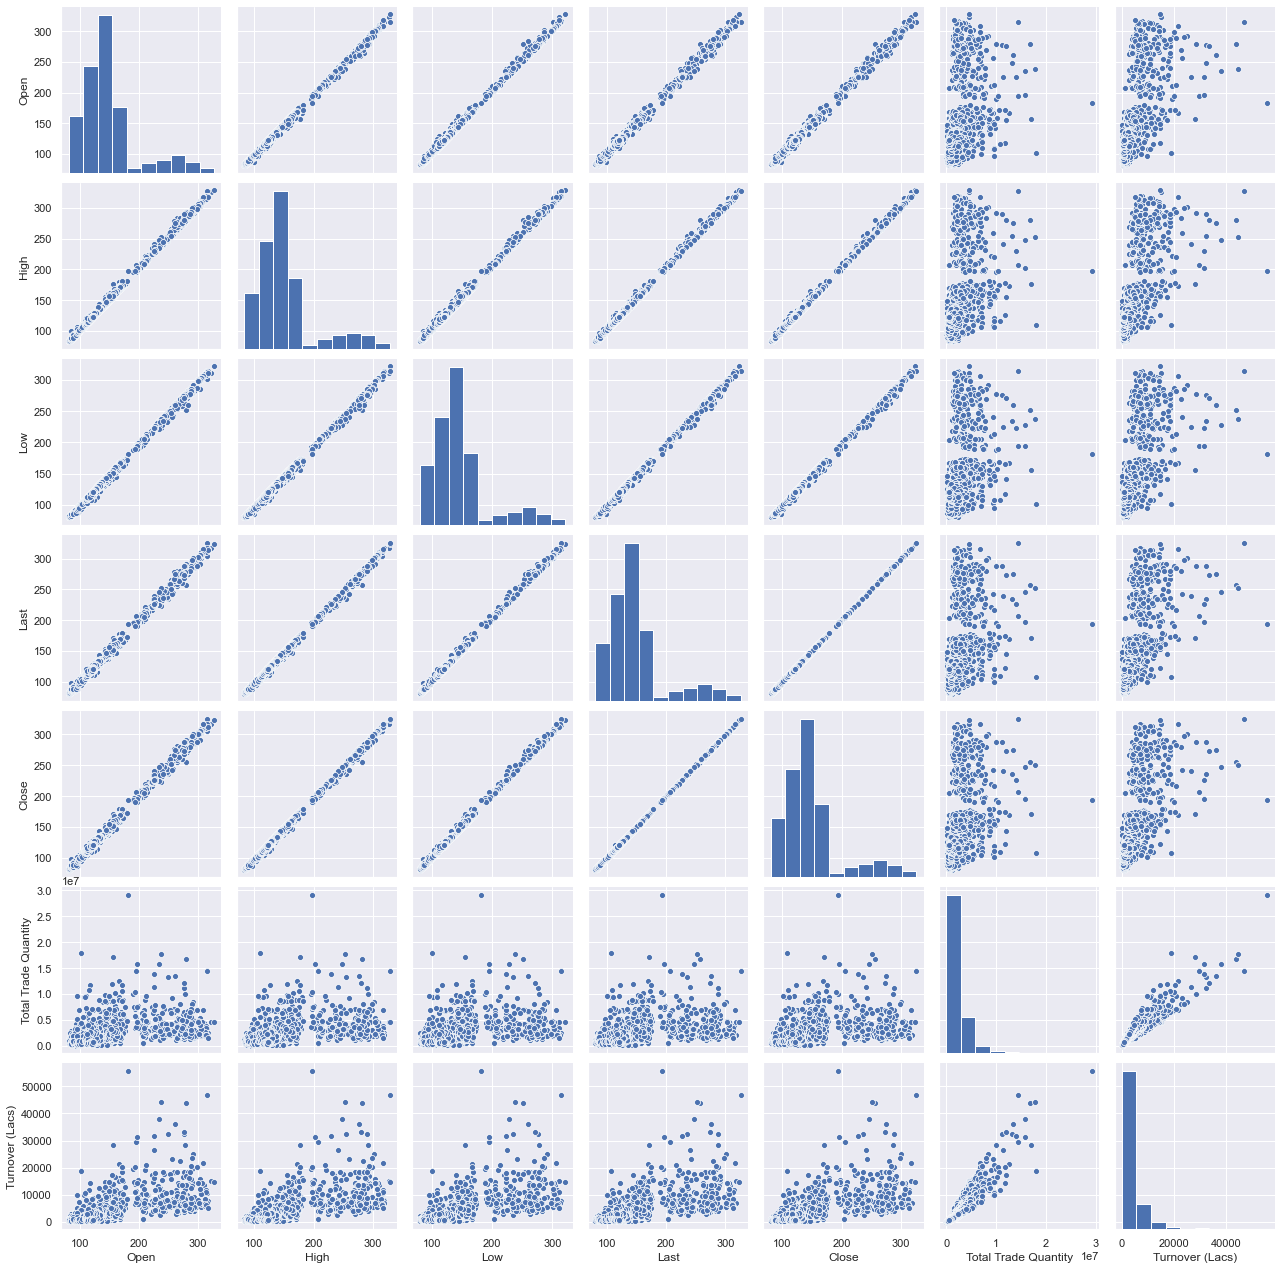

In [21]:
sns.pairplot(df)

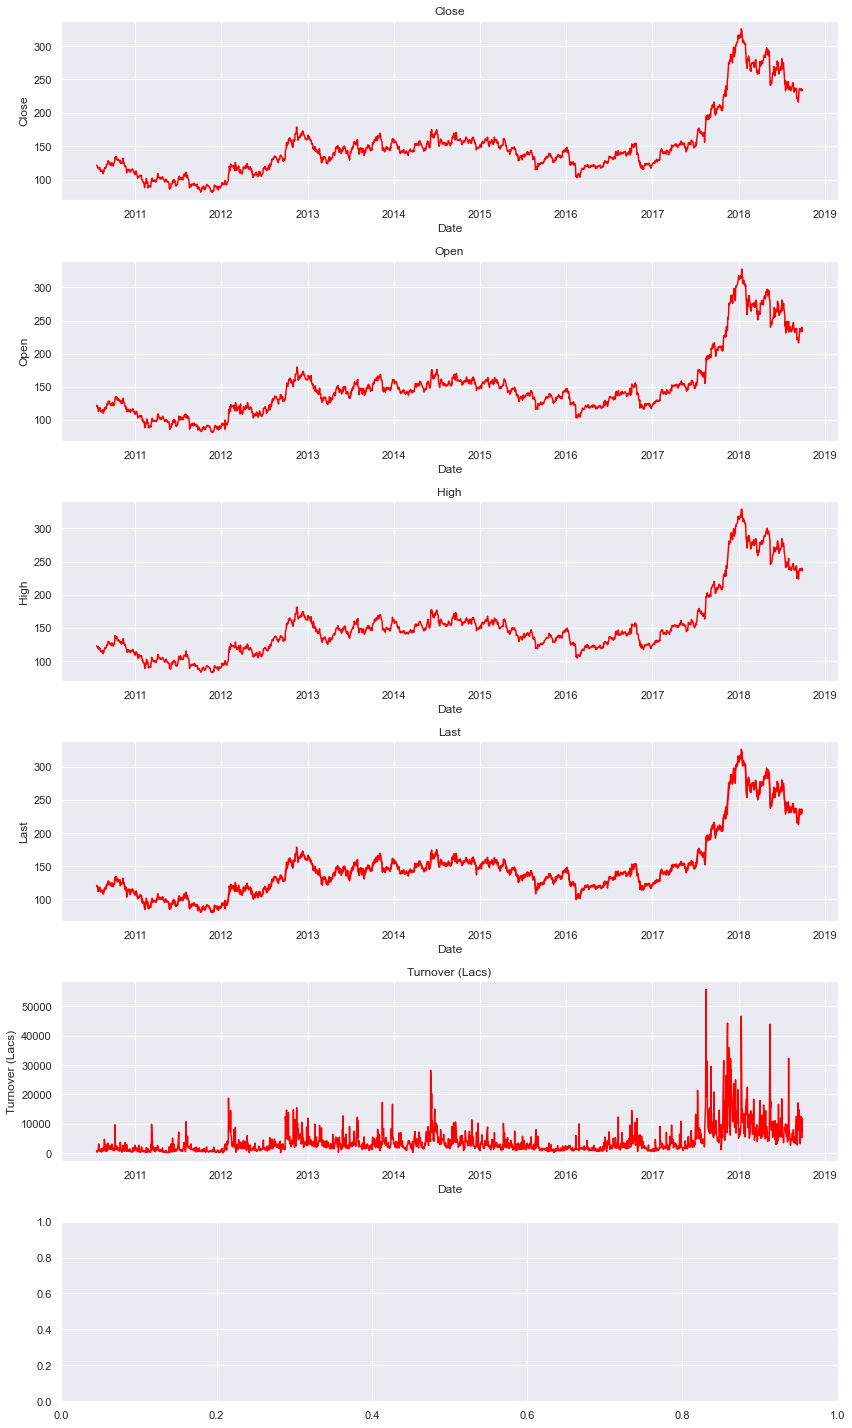

In [22]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(6,1, figsize = (12,20 ))
sns.lineplot(y= df["Close"],x=df['Date'], ax = ax[0],color='red').set(title='Close')
sns.lineplot(y= df["Open"],x=df['Date'], ax = ax[1],color='red').set(title='Open')
sns.lineplot(y= df["High"],x=df['Date'], ax = ax[2],color='red').set(title='High')
sns.lineplot(y= df["Low"],x=df['Date'], ax = ax[3],color='red').set(title='Low')
sns.lineplot(y= df["Last"],x=df['Date'], ax = ax[3],color='red').set(title='Last')
sns.lineplot(y= df["Turnover (Lacs)"],x=df['Date'], ax = ax[4],color='red').set(title='Turnover (Lacs)')
plt.tight_layout()


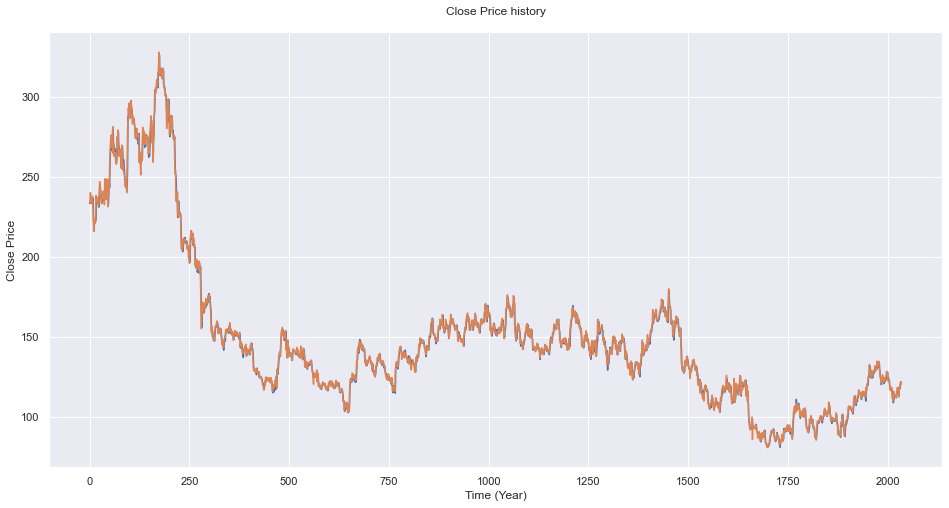

In [23]:
plt.figure(figsize=(16,8))
plt.title('Close Price history\n')
plt.xlabel('Time (Year)')
plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.plot(df['Open'])


### Creating a dataframe for storing the Closing stock data per day

In [24]:
# convert an array of values into a dataset matrix
def create_dataset(df2, look_back=1):
    dataX, dataY = [], []
    for i in range(len(df2)-look_back-1):
        a = df2[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(df2[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [25]:
df_pre = pd.read_csv('F:/letsgrow/stock.txt', usecols=[5], engine='python')
df_pre.dropna(inplace=True)
df_pre = df_pre.values
df_pre=df_pre.astype('float32')

### Data Normalization and Division into Training and Test sets

In [26]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
df2 = scaler.fit_transform(df_pre)

# split into train and test sets
train_size = int(len(df2) * 0.67)
test_size = len(df2) - train_size
train, test = df2[0:train_size,:], df2[train_size:len(df2),:]

### Numerical Analysis

In [27]:
# reshape into X=t and Y=t+1
lb = 2
trainX, trainY = create_dataset(train, lb)
testX, testY = create_dataset(test, lb)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

### Model Building

In [28]:
model = Sequential()
model.add(LSTM(7, input_shape=(lb, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=5, verbose=2)

Epoch 1/50
272/272 - 2s - loss: 0.0369
Epoch 2/50
272/272 - 0s - loss: 0.0053
Epoch 3/50
272/272 - 0s - loss: 5.9846e-04
Epoch 4/50
272/272 - 0s - loss: 2.8507e-04
Epoch 5/50
272/272 - 0s - loss: 2.8146e-04
Epoch 6/50
272/272 - 0s - loss: 2.8263e-04
Epoch 7/50
272/272 - 0s - loss: 2.8104e-04
Epoch 8/50
272/272 - 0s - loss: 2.8444e-04
Epoch 9/50
272/272 - 0s - loss: 2.8302e-04
Epoch 10/50
272/272 - 0s - loss: 2.8653e-04
Epoch 11/50
272/272 - 0s - loss: 2.8463e-04
Epoch 12/50
272/272 - 0s - loss: 2.9592e-04
Epoch 13/50
272/272 - 0s - loss: 2.9311e-04
Epoch 14/50
272/272 - 0s - loss: 2.8699e-04
Epoch 15/50
272/272 - 0s - loss: 2.8888e-04
Epoch 16/50
272/272 - 0s - loss: 2.8410e-04
Epoch 17/50
272/272 - 0s - loss: 2.8358e-04
Epoch 18/50
272/272 - 0s - loss: 2.8734e-04
Epoch 19/50
272/272 - 0s - loss: 2.8539e-04
Epoch 20/50
272/272 - 0s - loss: 2.8518e-04
Epoch 21/50
272/272 - 0s - loss: 2.9604e-04
Epoch 22/50
272/272 - 0s - loss: 2.9060e-04
Epoch 23/50
272/272 - 0s - loss: 2.8139e-04
Epoch

In [29]:
train_pre=model.predict(trainX)
test_pre=model.predict(testX)
train_pre = scaler.inverse_transform(train_pre)
trainY = scaler.inverse_transform([trainY])
test_pre = scaler.inverse_transform(test_pre)
testY = scaler.inverse_transform([testY])

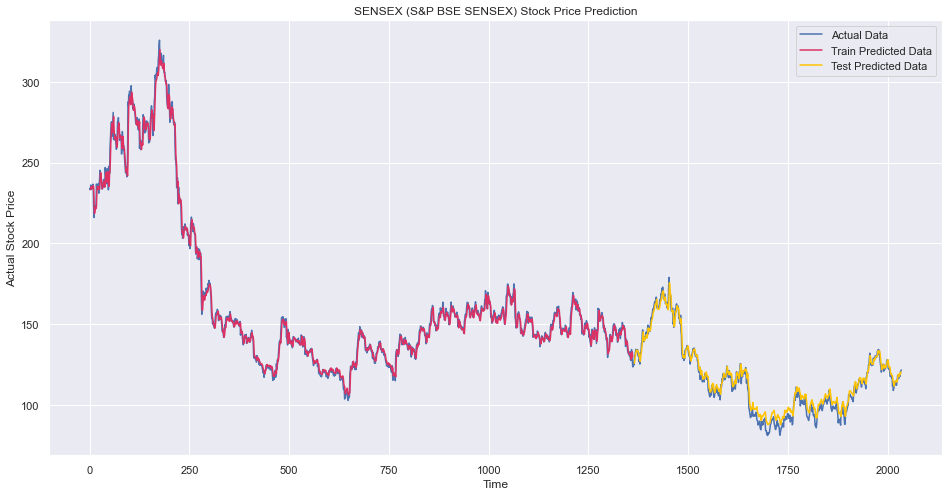

In [30]:
look_back=lb
# shift train predictions for plotting
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_pre)+look_back, :] = train_pre
# shift test predictions for plotting
testPredictPlot = np.empty_like(df2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_pre)+(look_back*2)+1:len(df2)-1, :] = test_pre
testPredictPlot
# plot baseline and predictions
plt.figure(figsize=(16,8))
plt.plot(scaler.inverse_transform(df2), label = 'Actual Data')
plt.title('SENSEX (S&P BSE SENSEX) Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.plot(trainPredictPlot,color='#DE3163', label = 'Train Predicted Data')
plt.plot(testPredictPlot, color='#FFC300', label = 'Test Predicted Data')
plt.legend(loc='best')
plt.show()

In [31]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], train_pre[:,0]))
print("Root mean square error of Training  = ",trainScore," RMSE")
testScore = math.sqrt(mean_squared_error(testY[0], test_pre[:,0]))
print("Root mean square error of Testing = ",testScore," RMSE")

Root mean square error of Training  =  3.8592108375886496  RMSE
Root mean square error of Testing =  3.763482423754622  RMSE
